__Simulated Nearest Neighbor Generator Code__

In [5]:
# ### libraries used in this script ###
import os
import pandas as pd
import seaborn as sns
from sim_nnd_helper_funct_git import NearestNeighbors
from sim_nnd_helper_funct_git import kd_ThomasCluster
from sim_nnd_helper_funct_git import RepeatThomasClusterNN
from sim_nnd_helper_funct_git import var_sim
from sim_nnd_helper_funct_git import bin_one
import numpy as np


In [6]:
## Variables  
radius=564.189
sigma=0.03535 #The value for the radius of a circle 


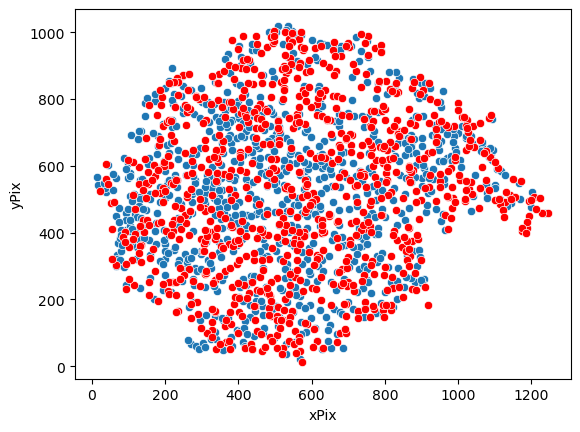

In [7]:
## Identify Emprical Nearest Neighbor Distances between two channel populations (TREK1, Piezo1)

#Read in data
cell=['A']
input_path=r"...\data"


dataframes=[]
for i in cell:
    for name in os.listdir(input_path):
        if name.startswith(i) and name.endswith("_TREK_NND.csv"):
            T1_input_file_path = os.path.join(input_path,name)

            # Read the input CSV file into a DataFrame
            TREK_df = pd.read_csv(T1_input_file_path)
            TREK_df['cell']=i
            TREK_df['channel']='TREK'
    

        elif name.startswith(i) and name.endswith("_Piezo_NND.csv"):
              P1_input_file_path = os.path.join(input_path, name)
              
              Piezo_df = pd.read_csv(P1_input_file_path)
              Piezo_df['cell']=i
              Piezo_df['channel']='Piezo'
                
        elif name.startswith(i) and name.endswith("_vars.csv"):
            var_path=os.path.join(input_path, name)
            var=pd.read_csv(var_path)
            var['cell']=i
            
        elif name.startswith(i) and name.endswith("_Mask.csv"):
            mask_path=os.path.join(input_path, name)
            mask=pd.read_csv(mask_path)
            mask['cell']=i            
            

    
#Convert micron location values to nm 
    TREK_df['XMnm']= TREK_df['XM'].mul(1000) 
    TREK_df['YMnm']= TREK_df['YM'].mul(1000) 
    Piezo_df['XMnm']=Piezo_df['XM'].mul(1000) 
    Piezo_df['YMnm']=Piezo_df['YM'].mul(1000) 
    

#Call in Variables
    Piezodensity_tc=(var.loc[0][11])
    TREKdensity_tc=(var.loc[0][8])
    pixel_conversion=(var.loc[0][28])
    sigmapix=sigma/pixel_conversion
    arenasize=(var.loc[0][5])
    Piezo_count=int((var.loc[0][9]))
    
#Convert pixelated, oversampled mask into nm for plot scale in X
    Piezo_df['xPix']=(((((Piezo_df['XMnm'])/1000)/pixel_conversion)).astype(int)) 
    Piezo_df['yPix']=(((((Piezo_df['YMnm'])/1000)/pixel_conversion)).astype(int))
                      
#Simulations: Loop over Variable %Clustering, 1000x
    pc=0
    TREKfinal_d=[]
    Piezofinal_d=[]
    
    TREKfinal,Piezofinal = RepeatThomasClusterNN(Piezodensity_tc,TREKdensity_tc, Piezo_count, Piezo_df, pc,pixel_conversion,sigmapix,arenasize, mask, radius,times=1000)
    TREKfinal_d.append(TREKfinal)
    Piezofinal_d.append(Piezofinal)
    
#TREKfinal output
    TC_df_q=pd.concat(TREKfinal_d)
    results_TREK=var_sim(TC_df_q)
    bin_sim_T1P1, bin_sim_T1T1=bin_one(TC_df_q)
    
#Piezofinal output
    PC_df_q=pd.concat(Piezofinal_d)
    results_Pz1=var_sim(PC_df_q)
    bin_sim_P1T1, bin_sim_P1P1=bin_one(PC_df_q)
    
#Extract Data for Visualization  

    output_path= ".../data/"
    
    file_name_T = f"{i}_TREK_simNND.csv"
    file_name_v= f"{i}_TREK_simSummary.csv"
    file_name_T1P1=f"{i}_T1P1_simBin.csv"
    file_name_T1T1=f"{i}_T1T1_simBin.csv"
    
    file_name_p1 = f"{i}_Pz1_simNND.csv"
    file_name_p1v= f"{i}_Pz1_simSummary.csv"
    file_name_P1T1=f"{i}_P1T1_simBin.csv"
    file_name_P1P1=f"{i}_P1P1_simBin.csv"
    
    name_path_T=output_path+file_name_T
    name_path_v=output_path+file_name_v
    name_path_other=output_path+file_name_T1P1
    name_path_self=output_path+file_name_T1T1
    
    name_path_p1T=output_path+file_name_p1 
    name_path_p1v=output_path+file_name_p1v
    name_path_p1other=output_path+file_name_P1T1
    name_path_p1self=output_path+file_name_P1P1
  
    bin_sim_T1P1.to_csv(name_path_other, index=False)
    bin_sim_T1T1.to_csv(name_path_self, index=False)
    TC_df_q.to_csv(name_path_T, index=False)
    results_TREK.to_csv(name_path_v, index=False)
    
    bin_sim_P1T1.to_csv(name_path_p1other, index=False)
    bin_sim_P1P1.to_csv(name_path_p1self, index=False)
    PC_df_q.to_csv(name_path_p1T, index=False)
    results_Pz1.to_csv(name_path_p1v, index=False)
